In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from mlxtend.plotting import scatterplotmatrix

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Heart dataset

In [2]:
heart_data_original = pd.read_csv('heart.csv')
heart_data = heart_data_original.copy()
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print(f'Goleminata na mnozestvoto e: {heart_data.shape[0]}')
print(f'Brojot na atributi e: {heart_data.shape[1]}')

Goleminata na mnozestvoto e: 303
Brojot na atributi e: 14


In [4]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

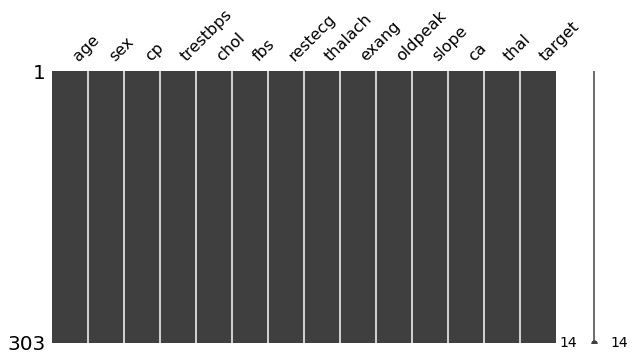

In [5]:
#Провери за празни атрибути односно атрибути што немаат вредност
missingno.matrix(heart_data, figsize=(10, 5))
heart_data.isna().sum()

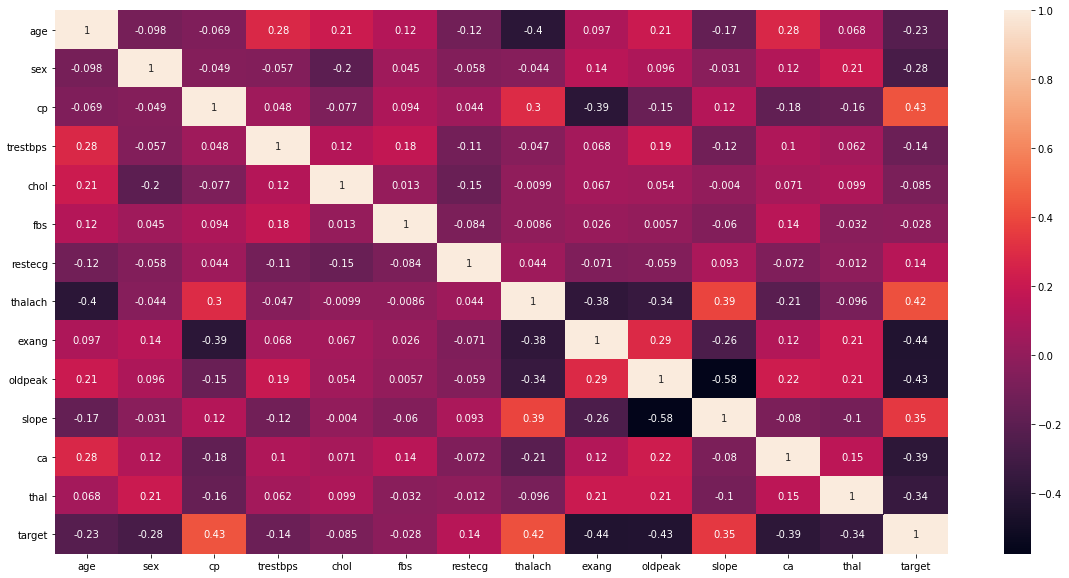

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(heart_data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].corr(), annot=True, ax=ax)
plt.show()

Од матрицата на корелација јасно се гледаат категориите што се во зависност со класата target. Овде во нашиот случај категориите што се во поголема зависност со класата target се **cp**, **thalach**, **exang**, **oldpeak**, **slope**, **ca** и **thal** односно сите категории чијшто коефициент на корелација е поголем или еднаков на 0.3.

Истите овие категории ќе ги анализираме подетално.

In [7]:
def group_and_analyse_data(feature):
    return heart_data[[feature, "target"]].groupby([feature], as_index=False).mean()

# Data analysis

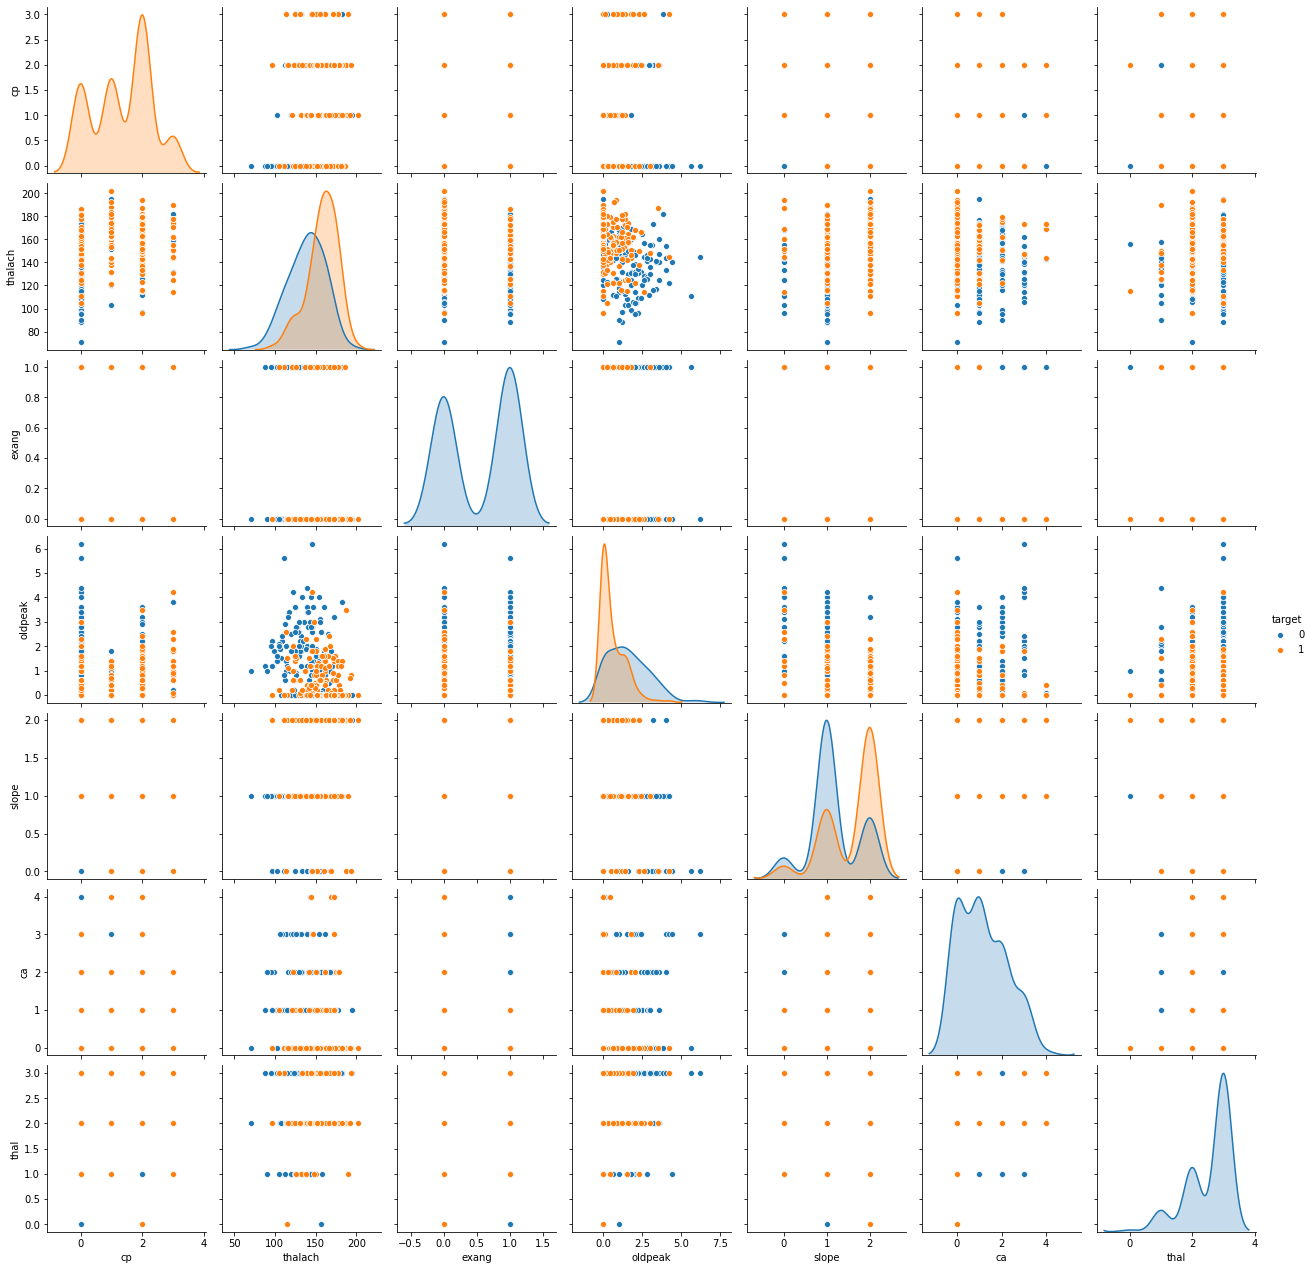

In [8]:
heart_data_scatterplot = heart_data_original.copy()
heart_data_scatterplot = heart_data_scatterplot.drop("age", axis=1).drop("sex", axis=1).drop("trestbps", axis=1).drop("chol", axis=1).drop("fbs", axis=1).drop("restecg", axis=1)
sns.pairplot(heart_data_scatterplot, hue="target")

<Figure size 864x576 with 0 Axes>

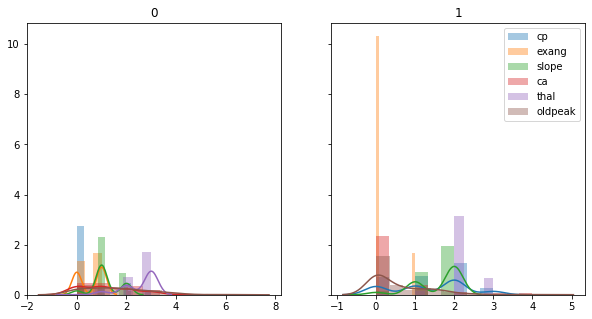

In [16]:
#change seaborn size
fig = plt.gcf()
fig.set_size_inches(12, 8)

def distplots(targets):
    j = 0
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    for i in range(len(targets)):
        sns.distplot(heart_data_original[heart_data_original.target == 0][targets[i]], label=targets[i], ax=axes[0])
        sns.distplot(heart_data_original[heart_data_original.target == 1][targets[i]], label=targets[i], ax=axes[1])
        
    for i in range(2):
        axes[i].set_title(i)
        axes[i].set_xlabel("")
        
    plt.legend()
    

distplots(["cp", "exang", "slope", "ca", "thal", "oldpeak"])

In [10]:
#cp или chest pain - вкупно се 4 типа
group_and_analyse_data("cp")

,cp,target
0,0,0.272727
1,1,0.820000
2,2,0.793103
3,3,0.695652


Појава на chest pain тип 1 (или болки во градите од тип 1) е поверојатна причина за болест на срцето. Наредно следува тип 2 па тип 3 и од анализата може да се воочи дека тип 0 најмалку има влијание врз болест на срцето.

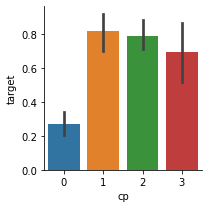

In [17]:
g = sns.catplot(x="cp", y ="target", data=heart_data, kind="bar", height=3)
plt.show()

In [18]:
#thalach или maximum heart rate achieved. Подобро е да ги групираме во интервали
heart_data["thalach"] = pd.cut(heart_data["thalach"], 5)

In [19]:
group_and_analyse_data("thalach")

,thalach,target
0,"(70.869, 97.2]",0.142857
1,"(97.2, 123.4]",0.297297
2,"(123.4, 149.6]",0.352273
3,"(149.6, 175.8]",0.678571
4,"(175.8, 202.0]",0.870968


Maximum heart rate achieved - доколку највисоко достигнатиот пулс е во рангот од 150 до 175 или 175 до 202 тогаш веројатноста за фаќање на срцева болест е поголема. Значително се намалува веројатноста на срцева болест доколку највисоко достигнатиот пулс е помал од 150 односно веројатноста за фаќање на срцева болест во најлош случај е ~35%.

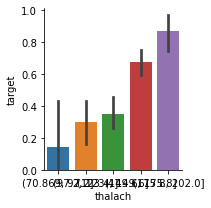

In [20]:
g = sns.catplot(x="thalach", y ="target", data=heart_data, kind="bar", height=3)
plt.show()

In [21]:
#exang или exercise induced angina
group_and_analyse_data("exang")

,exang,target
0,0,0.696078
1,1,0.232323


Доколку exercise induced angina e 0 тогаш поверојатно е да се појави срцева болест.

0    204
1     99
Name: exang, dtype: int64

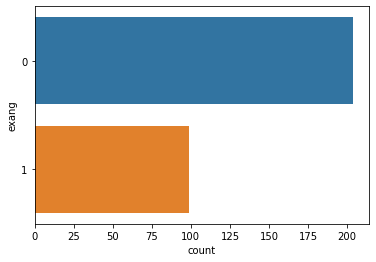

In [22]:
sns.countplot(y="exang", data=heart_data)
heart_data.exang.value_counts()

Од графикот се гледа дека 204 луѓе имале exercise induced angina тип 0 и 99 луѓе со тип 1

In [23]:
#oldpeak или ST depression induced by exercise relative to rest
group_and_analyse_data("oldpeak")

,oldpeak,target
0,0.0,0.747475
1,0.1,0.571429
2,0.2,0.750000
3,0.3,0.666667
4,0.4,0.888889
5,0.5,0.800000
6,0.6,0.714286
7,0.7,1.000000
8,0.8,0.538462
9,0.9,0.333333


За овој атрибут имаме 39 различни вредности. Ќе биде попрактично доколку истите ги групираме во интервали.

In [24]:
heart_data["oldpeak"] = pd.cut(heart_data["oldpeak"], 5)

In [25]:
group_and_analyse_data("oldpeak")

,oldpeak,target
0,"(-0.0062, 1.24]",0.668342
1,"(1.24, 2.48]",0.437500
2,"(2.48, 3.72]",0.096774
3,"(3.72, 4.96]",0.142857
4,"(4.96, 6.2]",0.000000


Сега појасно можеме да видеме дека колку е помала вредноста за овој атрибут толку веројатноста за срцева болест е поголема. Обратно на ова, што поголема вредност на атрибутот - помала веројатност за болест на срцето.

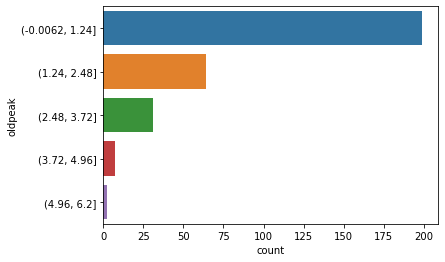

In [26]:
sns.countplot(y="oldpeak", data=heart_data)
plt.show()

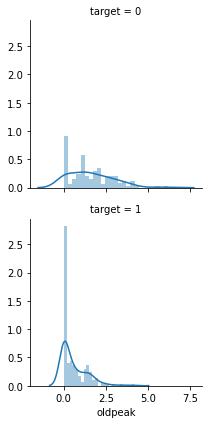

In [27]:
#информации од оригиналното множество (неподелено на интервали)
g = sns.FacetGrid(heart_data_original, row="target")
g.map(sns.distplot, "oldpeak", bins=25)
plt.show()

In [28]:
#the slope of the peak exercise ST segment
group_and_analyse_data("slope")

,slope,target
0,0,0.428571
1,1,0.350000
2,2,0.753521


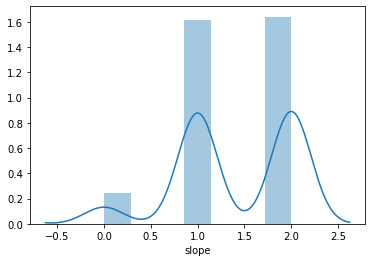

In [29]:
sns.distplot(heart_data["slope"])

In [30]:
#the slope of the peak exercise ST segment
group_and_analyse_data("ca")

,ca,target
0,0,0.742857
1,1,0.323077
2,2,0.184211
3,3,0.150000
4,4,0.800000


0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

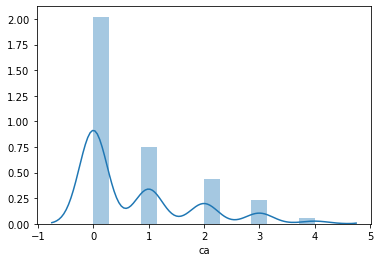

In [31]:
sns.distplot(heart_data["ca"])
heart_data.ca.value_counts()

In [32]:
#thal
group_and_analyse_data("thal")

,thal,target
0,0,0.500000
1,1,0.333333
2,2,0.783133
3,3,0.239316


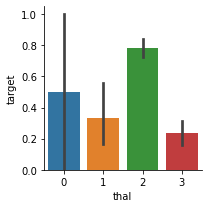

In [33]:
g = sns.catplot(x="thal", y ="target", data=heart_data, kind="bar", height=3)
plt.show()

## PCA

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

heart_data_original_pca = heart_data_original.drop("target", axis=1)
principalComponents = pca.fit_transform(heart_data_original_pca)

principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])

finalDf = pd.concat([principalDf, heart_data_original[['target']]], axis = 1)

# Градење на модел

In [35]:
#Split the data
x = heart_data_original.drop('target', axis=1)
y = heart_data_original.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

lda_score = round(lda.score(x_test, y_test), 2)
print("Tocnost na LDA modelot e: ", lda_score)

Tocnost na LDA modelot e:  0.8


In [37]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

qda_score = round(qda.score(x_test, y_test), 2)
print("Tocnost na QDA modelot e: ", qda_score)

Tocnost na QDA modelot e:  0.79


In [38]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb.fit(x_train, y_train)

gnb_score = round(gnb.score(x_test, y_test), 2)
print("Tocnost na Naive Bayes modelot e: ", gnb_score)

Tocnost na Naive Bayes modelot e:  0.84


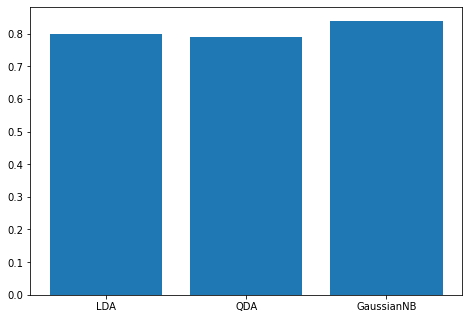

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

models = ['LDA', 'QDA', 'GaussianNB']
scores = [lda_score, qda_score, gnb_score]
ax.bar(models,scores)
plt.show()

Според графикот можеме да заклучиме мала предност на Naive Bayes класификатор во однос на LDA и QDA. Причината за овој резултат се воочува уште во самата анализа на податоците. Во feature plot-от се воочува дека податоците во поголем дел од случаите не се линеарно сепарабилни, дел од податоците со класа 0 се мешаат со податоците од класа 1 и обратно. Поради оваа причина имаме помала точност за LDA и QDA (поради самиот начин на работа на овие модели) а повисока точност за Naive Bayes.

In [40]:
heart_data_scatterplot.head()

,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,3,150,0,2.3,0,0,1,1
1,2,187,0,3.5,0,0,2,1
2,1,172,0,1.4,2,0,2,1
3,1,178,0,0.8,2,0,2,1
4,0,163,1,0.6,2,0,2,1


In [41]:
#Split the data
x = heart_data_scatterplot.drop('target', axis=1)
y = heart_data_scatterplot.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

lda_score = round(lda.score(x_test, y_test), 2)
print("Tocnost na LDA modelot e: ", lda_score)

Tocnost na LDA modelot e:  0.81


In [43]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

qda_score = round(qda.score(x_test, y_test), 2)
print("Tocnost na QDA modelot e: ", qda_score)

Tocnost na QDA modelot e:  0.79


In [44]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb.fit(x_train, y_train)

gnb_score = round(gnb.score(x_test, y_test), 2)
print("Tocnost na Naive Bayes modelot e: ", gnb_score)

Tocnost na Naive Bayes modelot e:  0.84


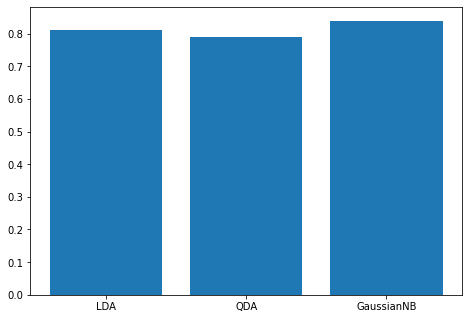

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

models = ['LDA', 'QDA', 'GaussianNB']
scores = [lda_score, qda_score, gnb_score]
ax.bar(models,scores)
plt.show()

Забележуваме минимално зголемување на LDA точноста доколку ги искористиме атрибутите што имаат повисок коефициент на корелација со класата target.

In [46]:
#Split the data for PCA
x = finalDf.drop('target', axis=1)
y = finalDf.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

lda_score = round(lda.score(x_test, y_test), 2)
print("Tocnost na LDA modelot e: ", lda_score)

Tocnost na LDA modelot e:  0.85


In [48]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

qda_score = round(qda.score(x_test, y_test), 2)
print("Tocnost na QDA modelot e: ", qda_score)

Tocnost na QDA modelot e:  0.85


In [49]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb.fit(x_train, y_train)

gnb_score = round(gnb.score(x_test, y_test), 2)
print("Tocnost na Naive Bayes modelot e: ", gnb_score)

Tocnost na Naive Bayes modelot e:  0.8


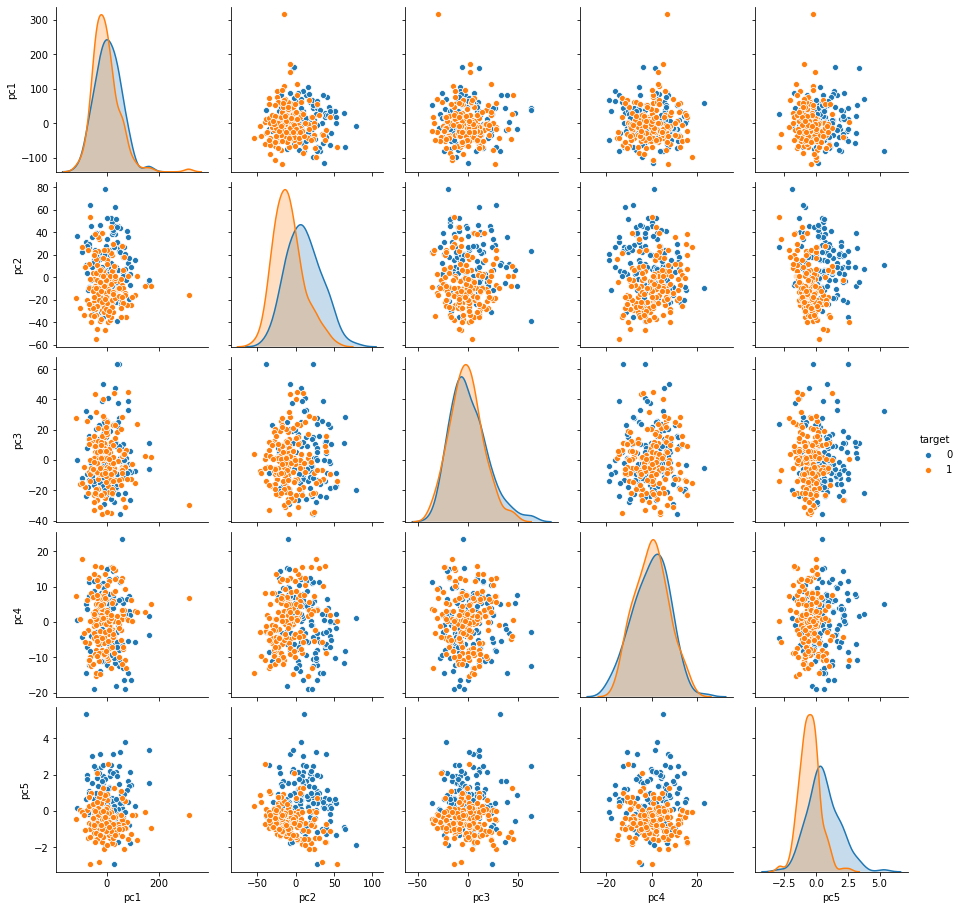

In [50]:
sns.pairplot(finalDf, hue="target")

Различни приори

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(priors = [0.1, 0.8])
lda.fit(x_train, y_train)

lda_score = round(lda.score(x_test, y_test), 2)
print("Tocnost na LDA modelot so priori 0.1 i 0.8 e: ", lda_score)

Tocnost na LDA modelot so priori 0.1 i 0.8 e:  0.78


In [52]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(priors = [0.1, 0.8])
qda.fit(x_train, y_train)

qda_score = round(qda.score(x_test, y_test), 2)
print("Tocnost na QDA modelot so priori 0.1 i 0.8 e: ", qda_score)

Tocnost na QDA modelot so priori 0.1 i 0.8 e:  0.81


In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True, priors = [0.1,0.8])
lda.fit(x_train, y_train)

lda_score = round(lda.score(x_test, y_test), 2)
print("Tocnost na LDA modelot so priori 0.1 i 0.1 e: ", lda_score)

Tocnost na LDA modelot so priori 0.1 i 0.1 e:  0.78


Со пресметување на коваријансната матрица, сетирајќи store_covariance=True (по default e False), точноста на моделот е повторно иста т.е 0,78. Во играта со приори се користи PCA множеството со 5 димензии. 

## Abalone dataset

In [54]:
abalone_data_original = pd.read_csv('Abalone.csv')
abalone_data = abalone_data_original.copy()
abalone_data.head()

,gender,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [55]:
abalone_data.shape[0]

4177

In [56]:
abalone_data.shape[1]

9

In [57]:
abalone_data.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


gender            0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64

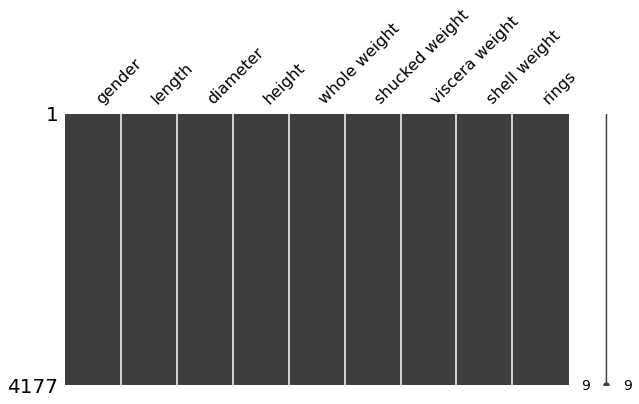

In [58]:
missingno.matrix(abalone_data, figsize=(10, 5))
abalone_data.isna().sum()

Од матрицата на вредности што недостасуваат и од сумирање на NaN елементи јасно се гледа дека ова податочно множество нема празни елементи.

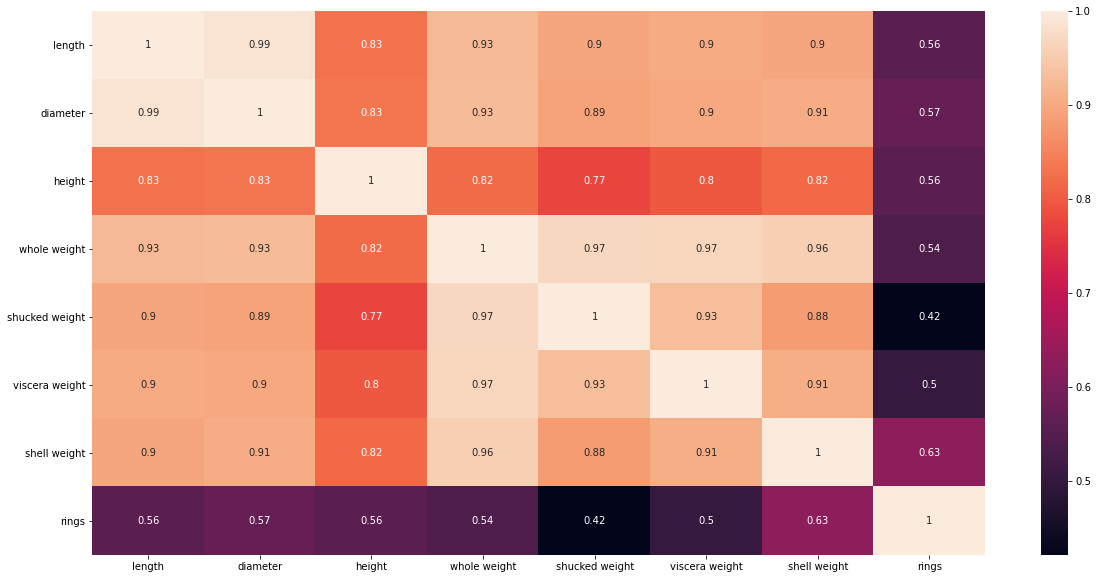

In [59]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(abalone_data[list(abalone_data.columns)].corr(), annot=True, ax=ax)
plt.show()

Од матрицата на корелација се приметува дека скоро сите атрибути, освен shucked weight што отстапува за некоја вредност, се во линеарна врска со класата rings со коефициент на корелација >= 0.5

In [60]:
abalone_data.head()

,gender,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Data analysis

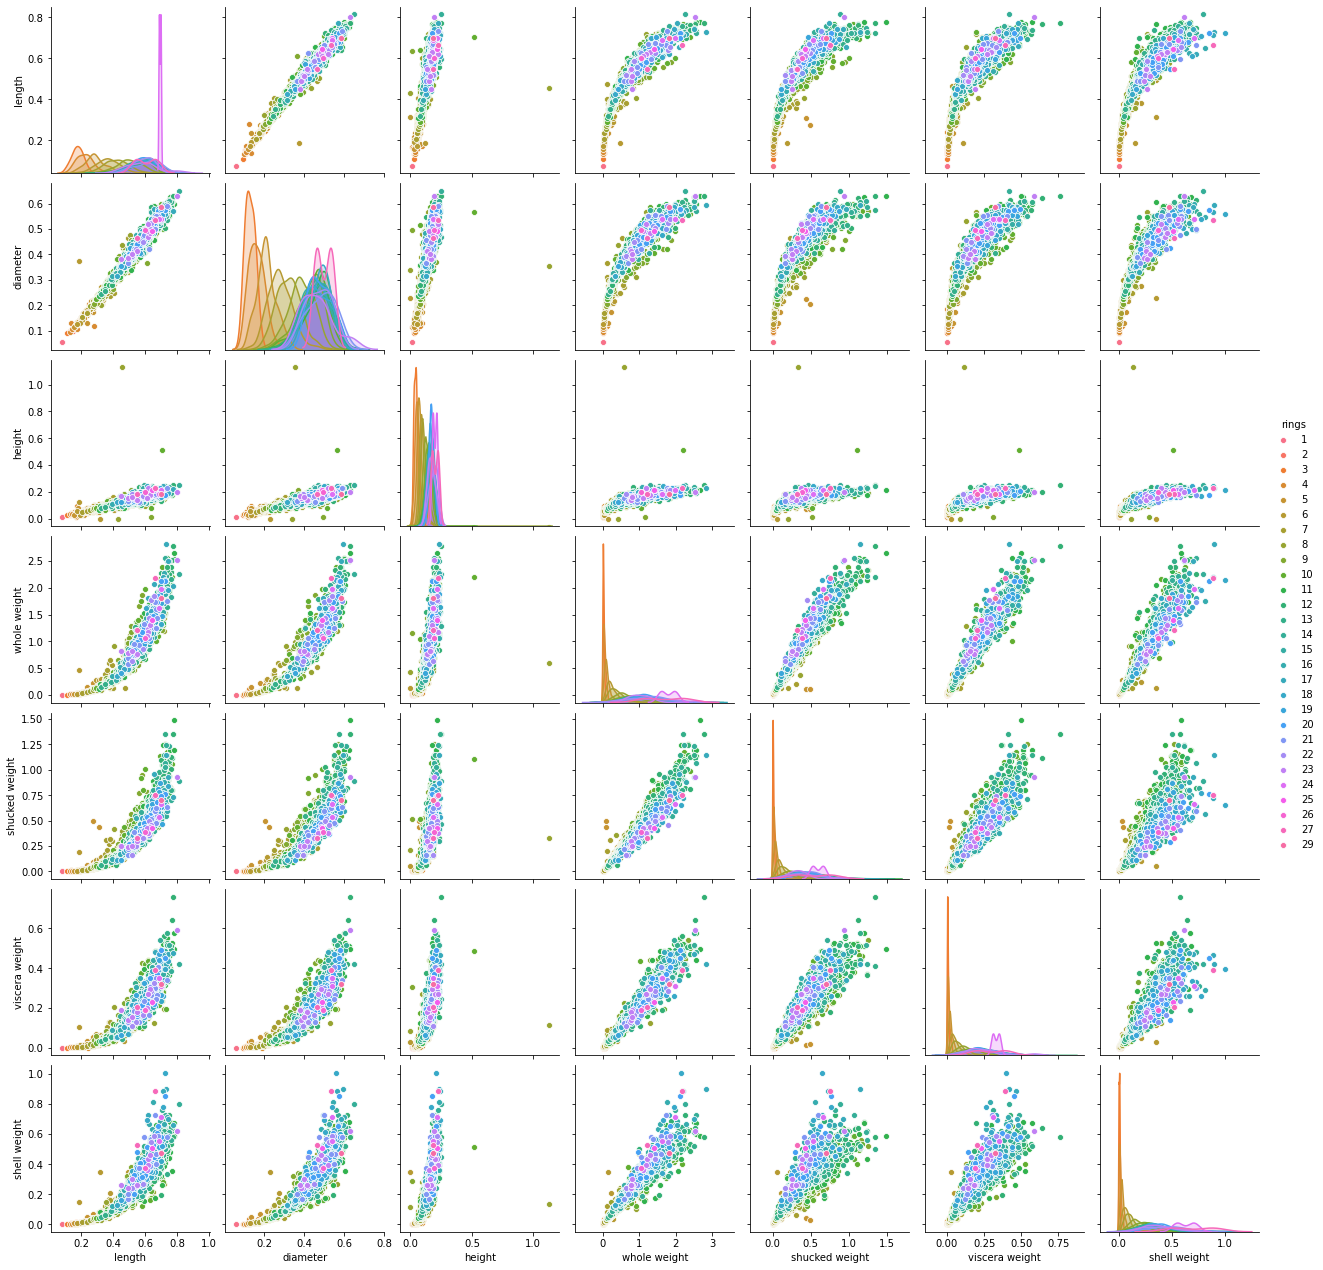

In [61]:
sns.pairplot(abalone_data_original, hue='rings')

Од анализата на меѓукласната зависност можат да се воочат outlier-и на повеќе места. Сега за сега нема да ги разрешуваме.

In [62]:
def split_to_intervals(feature, size):
    abalone_data[feature] = pd.cut(abalone_data[feature], size)

In [63]:
def count_unique(feature):
    return len(np.unique(abalone_data[feature]))

In [64]:
abalone_data.gender.value_counts()

M    1528
I    1342
F    1307
Name: gender, dtype: int64

Полот е единствениот атрибут во нашето множество што не е од нумерички тип. Поради таа причина ќе го трансформираме во нумерички така што ќе ја замениме М вредноста со 1, F со 0 и I со 2.

In [65]:
abalone_data.replace(['F', 'M', 'I'], [0, 1, 2], inplace=True)
abalone_data.head()

,gender,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


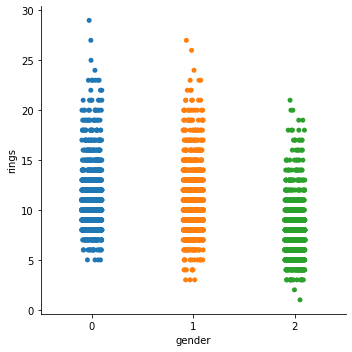

In [66]:
sns.catplot(x='gender', y='rings', data=abalone_data)
plt.show()

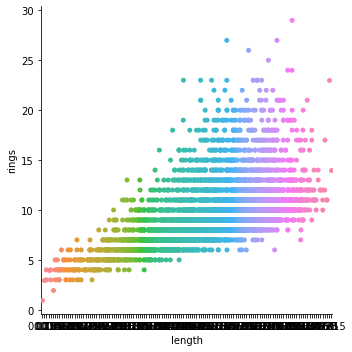

In [67]:
sns.catplot(x='length', y='rings', data=abalone_data)
plt.show()

In [68]:
count_unique("length")
#бројот на уникатни вредности за length е 134

134

Со ваков тип на визуелизација, анализата е потешка па затоа ќе ги групираме овие вредности во интервали.

In [69]:
# abalone_data["length"] = pd.cut(abalone_data["length"], 10)
split_to_intervals("length", 10)

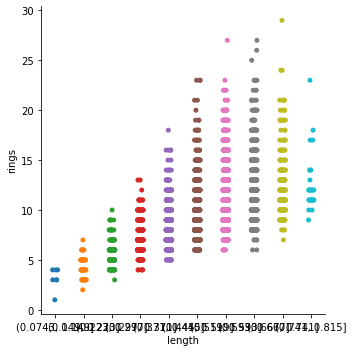

In [70]:
sns.catplot(x='length', y='rings', data=abalone_data) #height=15 за подобра визија
plt.show()

Според податоците на графикот се воочува дека гастроподот е најстар доколку должината му е во рангот од (0.519, 0.741].

In [71]:
# abalone_data["diameter"] = pd.cut(abalone_data["diameter"], 10)
split_to_intervals("diameter", 10)

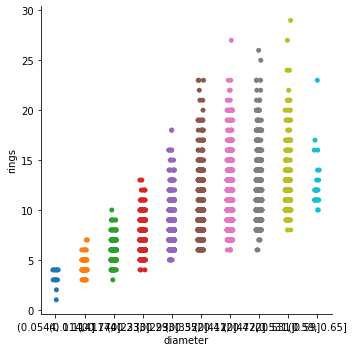

In [72]:
sns.catplot(x='diameter', y='rings', data=abalone_data) #height=15 за подобра визија
plt.show()

In [73]:
abalone_data.head()

,gender,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,1,"(0.445, 0.519]","(0.352, 0.412]",0.095,0.5140,0.2245,0.1010,0.150,15
1,1,"(0.297, 0.371]","(0.233, 0.293]",0.090,0.2255,0.0995,0.0485,0.070,7
2,0,"(0.519, 0.593]","(0.412, 0.472]",0.135,0.6770,0.2565,0.1415,0.210,9
3,1,"(0.371, 0.445]","(0.352, 0.412]",0.125,0.5160,0.2155,0.1140,0.155,10
4,2,"(0.297, 0.371]","(0.233, 0.293]",0.080,0.2050,0.0895,0.0395,0.055,7


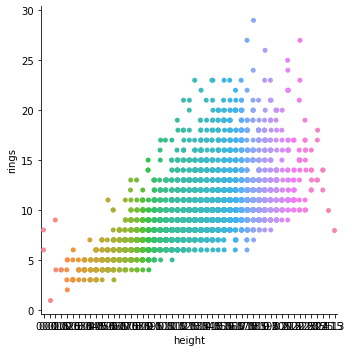

In [74]:
sns.catplot(x='height', y='rings', data=abalone_data) #height=15 за подобра визија
plt.show()

In [75]:
split_to_intervals("height", 10)

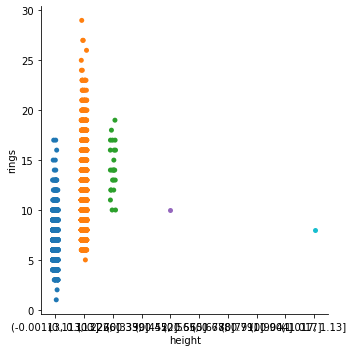

In [76]:
sns.catplot(x='height', y='rings', data=abalone_data) #height=15 за подобра визија
plt.show()

# PCA

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

abalone_data_original_pca = abalone_data_original.drop("rings", axis=1)
abalone_data_original_pca.replace(['F', 'M', 'I'], [0, 1, 2], inplace=True)

principalComponents = pca.fit_transform(abalone_data_original_pca)

principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4'])

finalDf = pd.concat([principalDf, abalone_data_original[['rings']]], axis = 1)

# Градење на модел

In [78]:
#Split the data
x = abalone_data_original.drop('rings', axis=1)
y = abalone_data_original.rings
x.replace(['F', 'M', 'I'], [0, 1, 2], inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

lda_score = round(lda.score(x_test, y_test), 2)
print("Tocnost na LDA modelot e: ", lda_score)

Tocnost na LDA modelot e:  0.27


In [80]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb.fit(x_train, y_train)

gnb_score = round(gnb.score(x_test, y_test), 2)
print("Tocnost na Naive Bayes modelot e: ", gnb_score)

Tocnost na Naive Bayes modelot e:  0.24


In [81]:
#Split the data for PCA
x = finalDf.drop('rings', axis=1)
y = finalDf.rings
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

lda_score = round(lda.score(x_test, y_test), 2)
print("Tocnost na LDA modelot e: ", lda_score)

Tocnost na LDA modelot e:  0.26


In [83]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb.fit(x_train, y_train)

gnb_score = round(gnb.score(x_test, y_test), 2)
print("Tocnost na Naive Bayes modelot e: ", gnb_score)

Tocnost na Naive Bayes modelot e:  0.28


Забележуваме мала точност и со РСА и без РСА. Самото ова е потенцирано и во документацијата на множеството (abalone.names) каде што највисоката добиена точност е 26.25% од тестирање во 1995та година. Причината, според мене се големиот број на класи. Со овие пристапи ќе имаме вкупно 29 веројатности посебно за секоја класа и тоа е причината за малата точност. Сепак, подобри резултати можат да се добијат доколку ги групираме годините 1-8 во една група, 9 и 10 во друга и сите останати поголеми од 11 во трета.

In [84]:
abalone_data = abalone_data_original.copy()

abalone_data.loc[abalone_data.rings <= 8, 'rings'] = 0
abalone_data.loc[(abalone_data.rings == 9) | (abalone_data.rings == 10), 'rings'] = 1
abalone_data.loc[abalone_data.rings >= 11, 'rings'] = 2

abalone_data['gender'].replace(['F', 'M', 'I'], [0, 1, 2], inplace=True)
abalone_data.rings.value_counts()

2    1447
0    1407
1    1323
Name: rings, dtype: int64

In [85]:
#Split the data
x = abalone_data.drop('rings', axis=1)
y = abalone_data.rings

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

lda_score = round(lda.score(x_test, y_test), 2)
print("Tocnost na LDA modelot e: ", lda_score)

Tocnost na LDA modelot e:  0.64


In [87]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

qda_score = round(qda.score(x_test, y_test), 2)
print("Tocnost na QDA modelot e: ", qda_score)

Tocnost na QDA modelot e:  0.62


In [88]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb.fit(x_train, y_train)

gnb_score = round(gnb.score(x_test, y_test), 2)
print("Tocnost na Naive Bayes modelot e: ", gnb_score)

Tocnost na Naive Bayes modelot e:  0.58


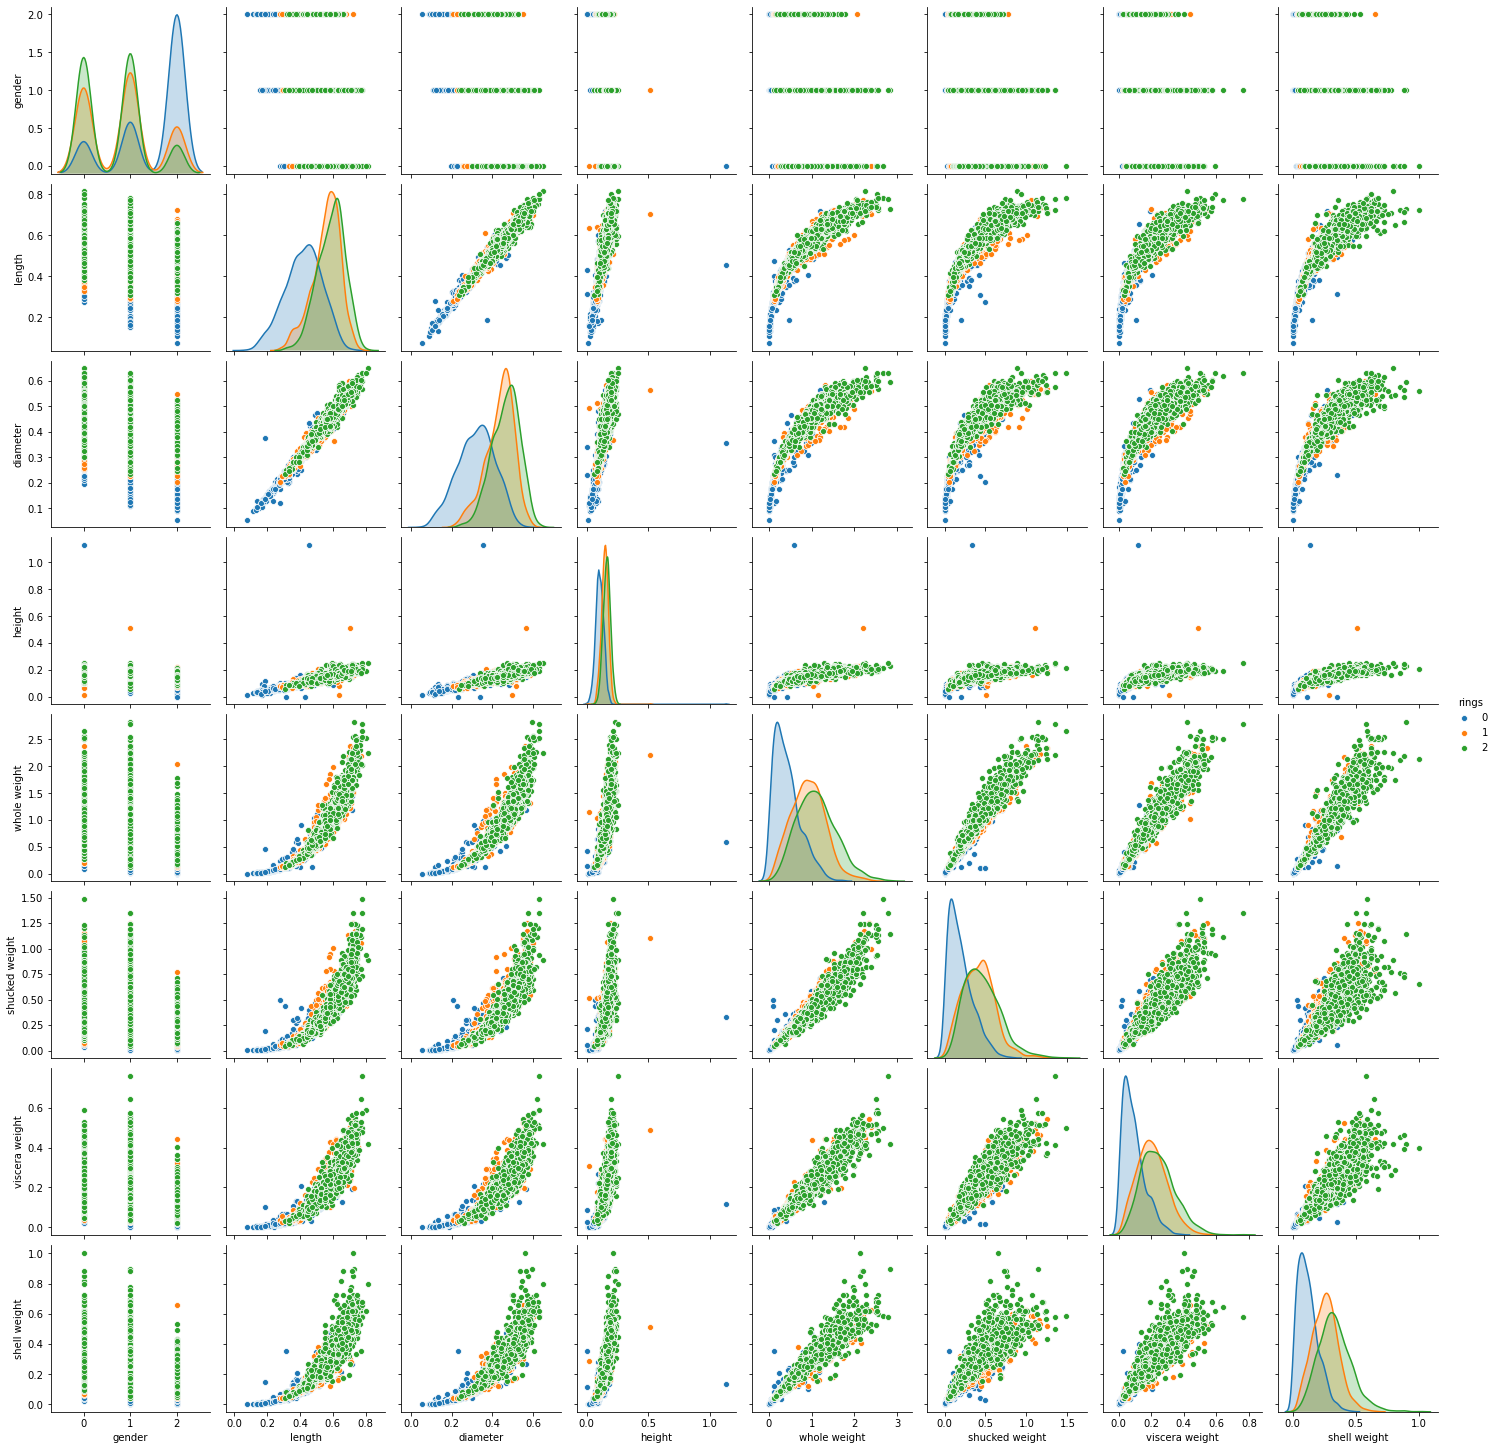

In [89]:
sns.pairplot(abalone_data, hue='rings')

Веднаш се забележува поголема точност од околу 64%.

# PCA на множество со групирани класи

In [209]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

abalone_data_original_pca = abalone_data.drop("rings", axis=1)

principalComponents = pca.fit_transform(abalone_data_original_pca)

principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4'])

finalDf = pd.concat([principalDf, abalone_data[['rings']]], axis = 1)

In [210]:
#Split the data for PCA
x = finalDf.drop('rings', axis=1)
y = finalDf.rings
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [211]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

lda_score = round(lda.score(x_test, y_test), 2)
print("Tocnost na LDA modelot e: ", lda_score)

Tocnost na LDA modelot e:  0.63


In [213]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

qda_score = round(qda.score(x_test, y_test), 2)
print("Tocnost na QDA modelot e: ", qda_score)

Tocnost na QDA modelot e:  0.62


In [214]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
gnb.fit(x_train, y_train)

gnb_score = round(gnb.score(x_test, y_test), 2)
print("Tocnost na Naive Bayes modelot e: ", gnb_score)

Tocnost na Naive Bayes modelot e:  0.62


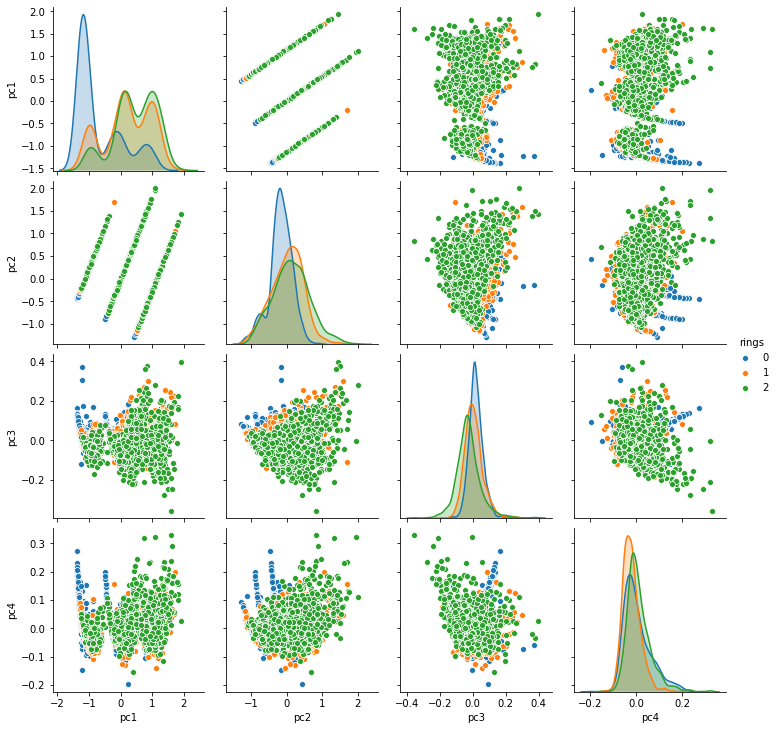

In [215]:
sns.pairplot(finalDf, hue='rings')